<a href="https://colab.research.google.com/github/jaehyun99/Computer_Vision/blob/main/Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## 폴더 버튼을 누르셔도 되고, 해당 코드를 수행하셔도 google drive와 mount가 됩니다.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt

## 2. 히스토그램 역투영

*   항목 추가
*   항목 추가



In [ ]:
# 이미지 읽기 및 변수에 저장

targetimg = cv2.imread("drive/MyDrive/PR201910807/images/lab02_people.jpg")  ##목표 이미지
modelimg = cv2.imread("drive/MyDrive/PR201910807/images/lab02_modelpatch.jpg") ##피부색 이미지

BGR 채널

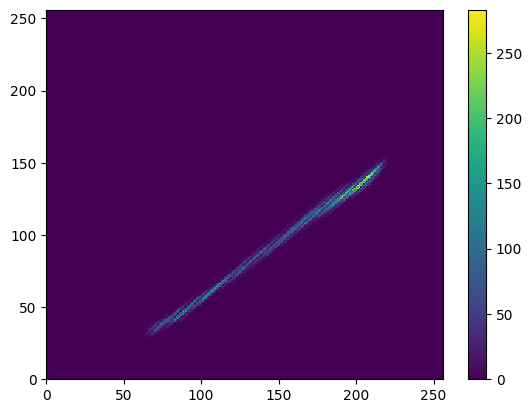

In [ ]:
## BGR 채널에서 G, R 사용
modelimg_BGR = modelimg
modelhist_BGR = cv2.calcHist([modelimg_BGR], [1,2], None, [256, 256], [0,256,0,256])
plt.pcolor(modelhist_BGR)
plt.colorbar()
plt.show()

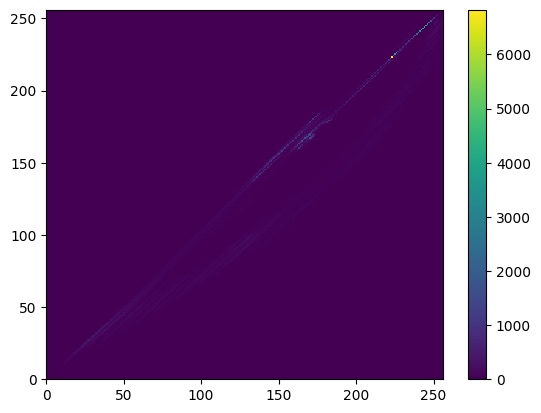

In [ ]:
targetimg_BGR = targetimg
targethist_BGR = cv2.calcHist([targetimg_BGR], [1, 2], None, [256, 256], [0,256,0,256])   ## G와 R에 대해 생성한 2D 히스토그램

plt.pcolor(targethist_BGR)
plt.colorbar()
plt.show()

In [ ]:
## 정규화 과정

print("Max value of Model hist before normalize {}".format(modelhist_BGR.max()))
print("Max value of Target hist before normalize {}".format(targethist_BGR.max()))
modelhist_BGR = modelhist_BGR/modelimg_BGR.size
targethist_BGR = targethist_BGR/targetimg_BGR.size
print("Max value of Model hist {}".format(modelhist_BGR.max()))
print("Max value of Target hist {}".format(targethist_BGR.max()))

Max value of Model hist before normalize 283.0
Max value of Target hist before normalize 6828.0
Max value of Model hist 0.0011791666666666667
Max value of Target hist 0.0037933333333333335


In [ ]:
## 비율 히스토그램 생성 과정

hist_r = modelhist_BGR/ (targethist_BGR + 1e-7)
hist_r = np.minimum(hist_r, 1.0)

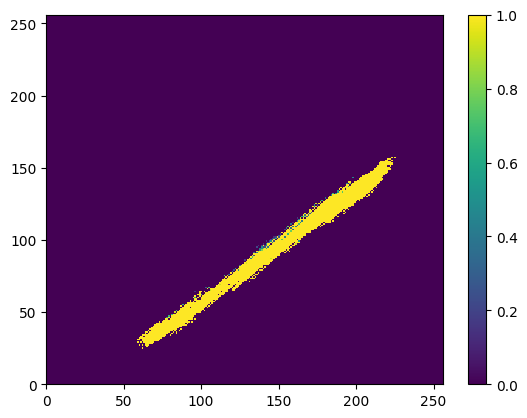

In [ ]:
plt.pcolor(hist_r)
plt.colorbar()
plt.show()

In [ ]:
height, width = targetimg_BGR.shape[0], targetimg_BGR.shape[1]
output = np.zeros_like(targetimg_BGR, dtype='float32')      #출력에 사용할 2D array을 목표 이미지와 같은 크기로 생성

In [ ]:
## 목표 이미지의 모든 pixel을 접근하여 비율 히스토그램의 값을 output arrray에 저장하는 과정

for i in range(height):
  for j in range(width):
    g_val = targetimg_BGR[i, j, 1]    ## BGR color space의 목표이미지에서 (i, j) 위치의 G 값 저장
    r_val = targetimg_BGR[i, j, 2]    ## BGR color space의 목표이미지에서 (i, j) 위치의 R 값 저장
    confidence = hist_r[g_val, r_val]   ## 비율 히스토그램에서 해당 (G, R) 의 값 저장
    output[i,j] = confidence        ## output array의 해당 위치 (i, j) 에 비율 히스토그램에서 찾은 confidence 저장

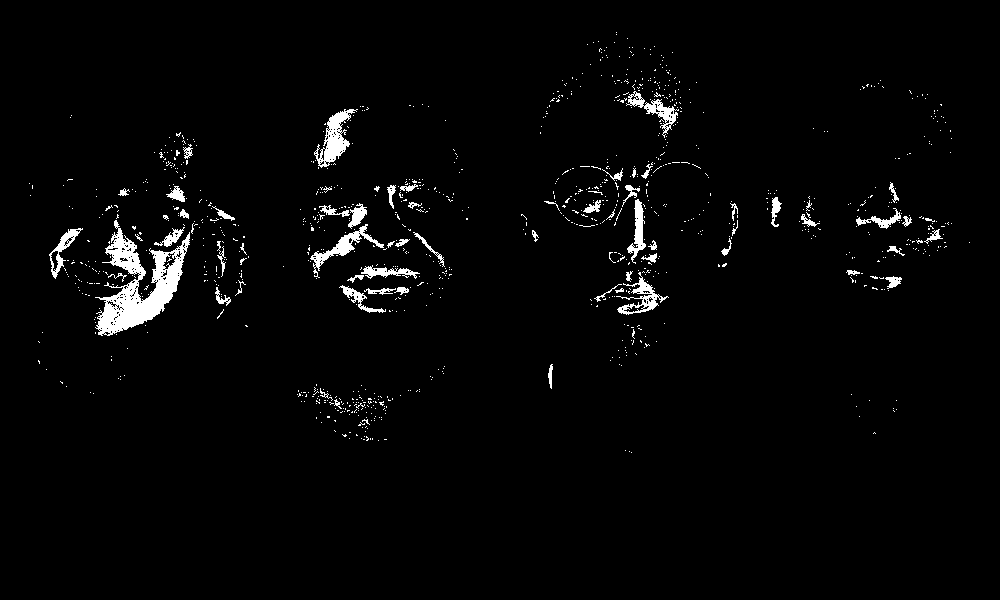

In [ ]:
## confidence는 0.0~1.0 사이의 값이기 때문에 threshold 값(0.02)을 설정하여 보다 클 경우 255, 작을 경우 0으로 binaray output으로 변경
ret, masked = cv2.threshold(output, 0.02, 255, cv2.THRESH_BINARY)
cv2_imshow(masked)

HSV 채널

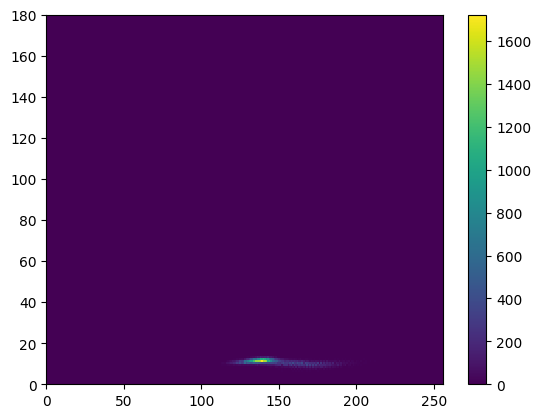

In [ ]:
## HSV 채널에서 H, S 사용
modelimg_hsv = cv2.cvtColor(modelimg, cv2.COLOR_BGR2HSV)  ## HSV color space 로 변경한 이미지
modelhist_hsv = cv2.calcHist([modelimg_hsv], [0, 1], None, [180, 256], [0,180,0,256])   ## H와 S에 대해 생성한 2D 히스토그램

plt.pcolor(modelhist_hsv)
plt.colorbar()
plt.show()

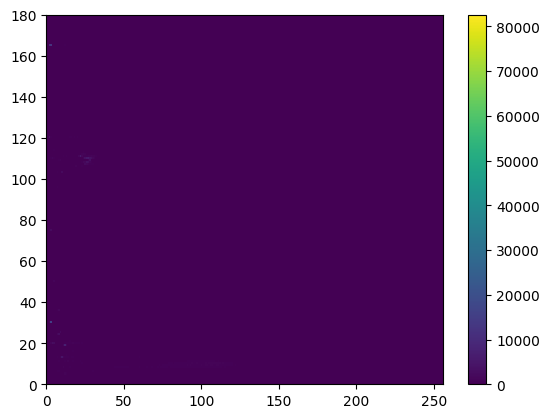

In [ ]:
targetimg_hsv = cv2.cvtColor(targetimg, cv2.COLOR_BGR2HSV)    ## HSV color space 로 변경한 이미지
targethist_hsv = cv2.calcHist([targetimg_hsv], [0, 1], None, [180, 256], [0,180,0,256])   ## H와 S에 대해 생성한 2D 히스토그램

plt.pcolor(targethist_hsv)
plt.colorbar()
plt.show()

In [ ]:
## 정규화 과정

print("Max value of Model hist before normalize {}".format(modelhist_hsv.max()))
print("Max value of Target hist before normalize {}".format(targethist_hsv.max()))
modelhist_hsv = modelhist_hsv/modelimg.size
targethist_hsv = targethist_hsv/targetimg.size
print("Max value of Model hist {}".format(modelhist_hsv.max()))
print("Max value of Target hist {}".format(targethist_hsv.max()))

Max value of Model hist before normalize 1723.0
Max value of Target hist before normalize 82587.0
Max value of Model hist 0.007179166666666667
Max value of Target hist 0.04588166666666667


In [ ]:
## 비율 히스토그램 생성 과정

hist_r = modelhist_hsv/ (targethist_hsv + 1e-7)
hist_r = np.minimum(hist_r, 1.0)

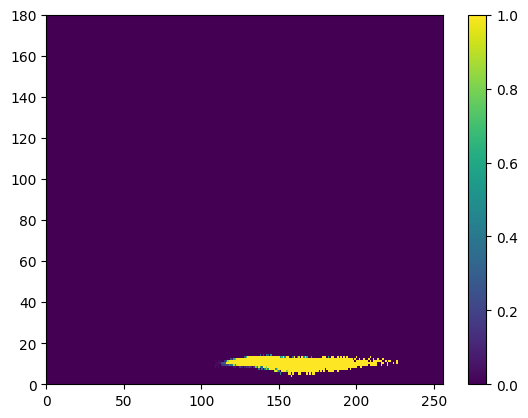

In [ ]:
plt.pcolor(hist_r)
plt.colorbar()
plt.show()

In [ ]:
height, width = targetimg.shape[0], targetimg.shape[1]
output = np.zeros_like(targetimg, dtype='float32')      #출력에 사용할 2D array을 목표 이미지와 같은 크기로 생성

In [ ]:
## 목표 이미지의 모든 pixel을 접근하여 비율 히스토그램의 값을 output arrray에 저장하는 과정

for i in range(height):
  for j in range(width):
    h_val = targetimg_hsv[i, j, 0]    ## HSV color space의 목표이미지에서 (i, j) 위치의 Hue 값 저장
    s_val = targetimg_hsv[i, j, 1]    ## HSV color space의 목표이미지에서 (i, j) 위치의 Saturation 값 저장
    confidence = hist_r[h_val, s_val]   ## 비율 히스토그램에서 해당 (Hue, Saturation) 의 값 저장
    output[i,j] = confidence        ## output array의 해당 위치 (i, j) 에 비율 히스토그램에서 찾은 confidence 저장

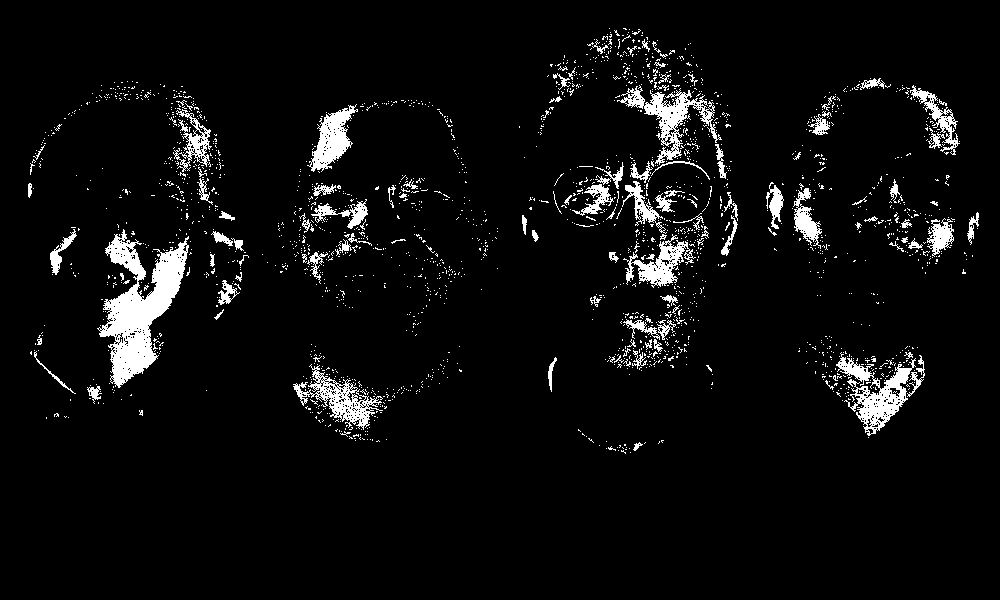

In [ ]:
## confidence는 0.0~1.0 사이의 값이기 때문에 threshold 값(0.02)을 설정하여 보다 클 경우 255, 작을 경우 0으로 binaray output으로 변경
ret, masked = cv2.threshold(output, 0.02, 255, cv2.THRESH_BINARY)
cv2_imshow(masked)

YCbCr 채널

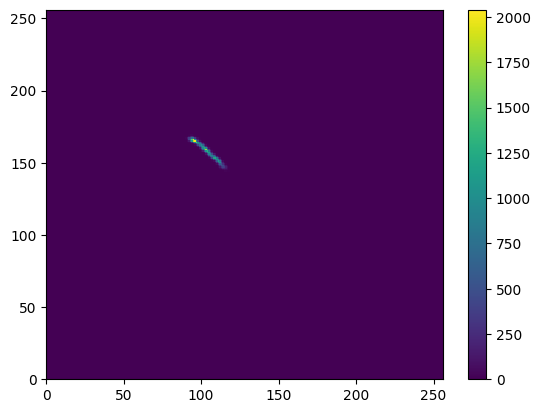

In [ ]:
## YCbCr 채널에서 Cb, Cr 사용

modelimg_ycbcr = cv2.cvtColor(modelimg, cv2.COLOR_BGR2YCrCb)
modelhist_ycbcr = cv2.calcHist([modelimg_ycbcr], [1,2], None,[256,256],[0,256,0,256])

plt.pcolor(modelhist_ycbcr)
plt.colorbar()
plt.show()


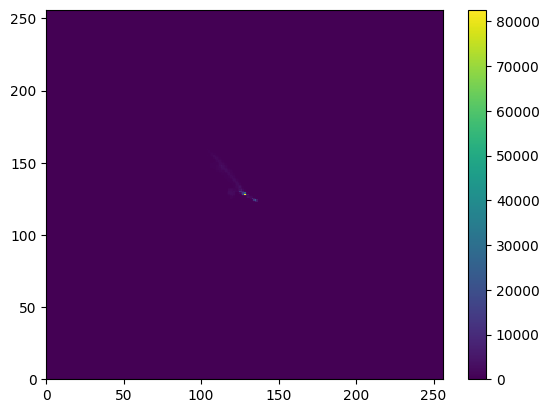

In [ ]:
targetimg_ycbcr = cv2.cvtColor(targetimg, cv2.COLOR_BGR2YCrCb)
targethist_ycbcr = cv2.calcHist([targetimg_ycbcr], [1, 2], None, [256, 256], [0,256,0,256])   ## Cb와 Cr에 대해 생성한 2D 히스토그램

plt.pcolor(targethist_ycbcr)
plt.colorbar()
plt.show()

In [ ]:
## 정규화 과정

print("Max value of Model hist before normalize {}".format(modelhist_ycbcr.max()))
print("Max value of Target hist before normalize {}".format(targethist_ycbcr.max()))
modelhist_ycbcr = modelhist_ycbcr/modelimg_ycbcr.size
targethist_ycbcr = targethist_ycbcr/targetimg_ycbcr.size
print("Max value of Model hist {}".format(modelhist_ycbcr.max()))
print("Max value of Target hist {}".format(targethist_ycbcr.max()))

Max value of Model hist before normalize 2041.0
Max value of Target hist before normalize 82587.0
Max value of Model hist 0.008504166666666667
Max value of Target hist 0.04588166666666667


In [ ]:
## 비율 히스토그램 생성 과정

hist_r = modelhist_ycbcr/ (targethist_ycbcr + 1e-7)
hist_r = np.minimum(hist_r, 1.0)

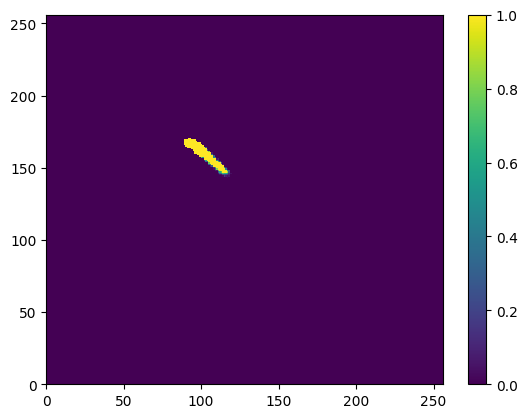

In [ ]:
plt.pcolor(hist_r)
plt.colorbar()
plt.show()

In [ ]:
height, width = targetimg_ycbcr.shape[0], targetimg_ycbcr.shape[1]
output = np.zeros_like(targetimg_ycbcr, dtype='float32')      #출력에 사용할 2D array을 목표 이미지와 같은 크기로 생성

In [ ]:
## 목표 이미지의 모든 pixel을 접근하여 비율 히스토그램의 값을 output arrray에 저장하는 과정

for i in range(height):
  for j in range(width):
    cb_val = targetimg_ycbcr[i, j, 1]    ## YCbCr color space의 목표이미지에서 (i, j) 위치의 Cb 값 저장
    cr_val = targetimg_ycbcr[i, j, 2]    ## YCbCr color space의 목표이미지에서 (i, j) 위치의 Cr 값 저장
    confidence = hist_r[cb_val, cr_val]   ## 비율 히스토그램에서 해당 (Cb, Cr) 의 값 저장
    output[i,j] = confidence        ## output array의 해당 위치 (i, j) 에 비율 히스토그램에서 찾은 confidence 저장

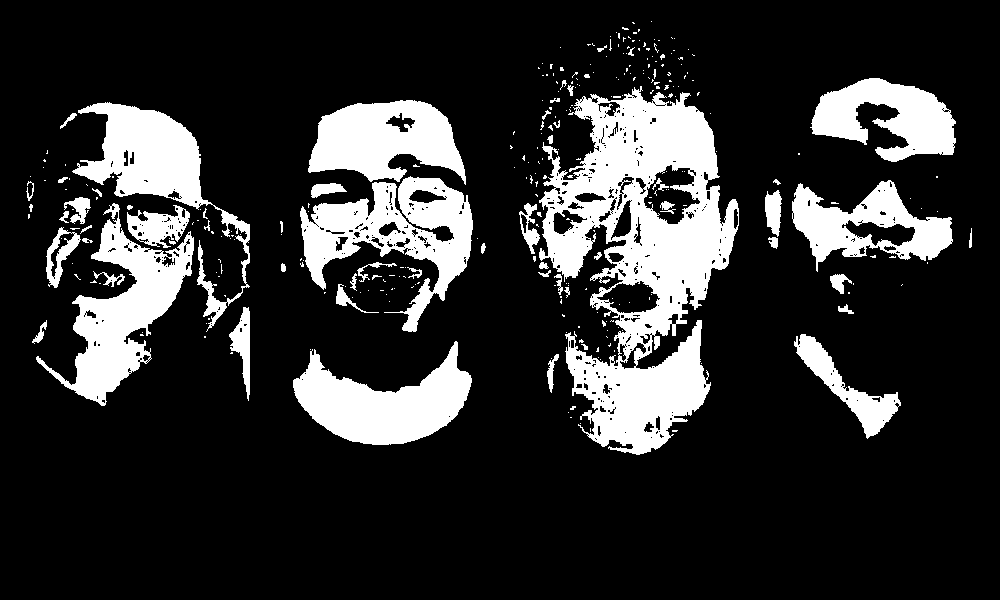

In [ ]:
## confidence는 0.0~1.0 사이의 값이기 때문에 threshold 값(0.02)을 설정하여 보다 클 경우 255, 작을 경우 0으로 binaray output으로 변경
ret, masked = cv2.threshold(output, 0.02, 255, cv2.THRESH_BINARY)
cv2_imshow(masked)